Q1: K-Fold Cross Validation for Multiple Linear Regression (Least Square Error Fit)
Download the dataset regarding USA House Price Prediction from the following link:
https://drive.google.com/file/d/1O_NwpJT-8xGfU_-3llUl2sgPu0xllOrX/view?usp=sharing
Load the dataset and Implement 5- fold cross validation for multiple linear regression
(using least square error fit).
Steps:
a) Divide the dataset into input features (all columns except price) and output variable
(price)
b) Scale the values of input features.
c) Divide input and output features into five folds.
d) Run five iterations, in each iteration consider one-fold as test set and remaining
four sets as training set. Find the beta (β) matrix, predicted values, and R2_score
for each iteration using least square error fit.
e) Use the best value of (β) matrix (for which R2_score is maximum), to train the
regressor for 70% of data and test the performance for remaining 30% data.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/USA_Housing.csv')

In [ ]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


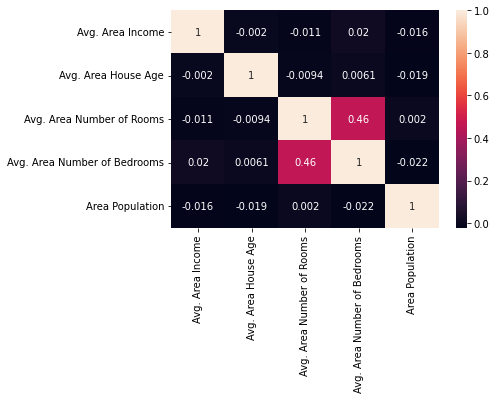

In [ ]:
import seaborn as sns
sns.heatmap(data.iloc[:,0:5].corr(),annot=True)

In [ ]:
X, y = data.iloc[:, 0:5], data.iloc[:, 5]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [ ]:
X_scaled

array([[ 1.        ,  1.02865969, -0.29692705,  0.02127433,  0.08806222,
        -1.31759867],
       [ 1.        ,  1.00080775,  0.02590164, -0.25550611, -0.72230146,
         0.40399945],
       [ 1.        , -0.68462915, -0.11230283,  1.5162435 ,  0.93084045,
         0.07240989],
       ...,
       [ 1.        , -0.48723454,  1.28447022, -2.17026949, -1.50025059,
        -0.29193658],
       [ 1.        , -0.05459152, -0.44669439,  0.14154061,  1.18205319,
         0.65111608],
       [ 1.        , -0.28831272,  0.01521477, -0.19434166,  0.07185495,
         1.04162464]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=42)

In [ ]:
X_train

array([[ 1.        , -1.25155908, -2.02901391,  1.96206583,  0.32306769,
         0.74505618],
       [ 1.        , -0.58905082,  0.51802457,  0.65581093, -0.64126509,
         1.09858717],
       [ 1.        ,  0.82222246, -0.5746743 ,  1.24823096, -0.70609418,
        -0.95283943],
       ...,
       [ 1.        , -0.22405818,  0.53537657, -0.37378791, -0.68178327,
         0.1133951 ],
       [ 1.        , -0.92790309,  1.4299047 ,  2.26865538,  0.27444587,
         1.39022039],
       [ 1.        , -0.69631047, -0.08161155,  0.88764104,  1.6682714 ,
        -0.01308001]])

In [ ]:
type(Y_train)

pandas.core.series.Series

In [ ]:
Y_train_val = Y_train.to_numpy()

In [ ]:
X_test

array([[ 1.        , -0.62640165,  1.04968821, -0.54441516, -0.59264327,
         0.77236229],
       [ 1.        , -1.0718764 ,  0.92402438, -0.06588201, -0.68988691,
         0.73590761],
       [ 1.        ,  0.15085847,  0.77452593, -0.32337135, -1.59749423,
        -0.70011282],
       ...,
       [ 1.        , -0.46145716,  0.75843774,  0.74091967, -0.44677781,
         0.79258814],
       [ 1.        , -1.17381103,  0.60473768, -0.02857245,  0.33927496,
         2.81986196],
       [ 1.        , -0.16974193, -0.50517233,  1.06663869, -0.69799055,
        -1.24640865]])

In [ ]:
Y_test_val = Y_test.to_numpy()

In [ ]:
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)

beta=C.dot(Y_train)

print(beta)

[1231278.63687691  230464.52520478  164159.19982569  120514.71328324
    2913.62424674  151019.35865134]


In [ ]:
X_train_T = np.matrix.transpose(X_train)

In [ ]:
XT_X = np.matmul(X_train_T, X_train)

In [ ]:
XT_X

array([[ 3.50000000e+03,  1.98597770e+00, -1.84523058e+01,
        -7.76358101e+00,  5.83867031e+00, -4.77963513e+01],
       [ 1.98597770e+00,  3.56760771e+03,  2.17178472e+01,
        -1.11881901e+01,  1.05409505e+02, -7.83183279e+01],
       [-1.84523058e+01,  2.17178472e+01,  3.48654389e+03,
        -3.94922709e+01,  1.90565521e+01,  2.18215939e+00],
       [-7.76358101e+00, -1.11881901e+01, -3.94922709e+01,
         3.53471179e+03,  1.62729132e+03, -2.92697921e+00],
       [ 5.83867031e+00,  1.05409505e+02,  1.90565521e+01,
         1.62729132e+03,  3.45019422e+03, -3.93561579e+01],
       [-4.77963513e+01, -7.83183279e+01,  2.18215939e+00,
        -2.92697921e+00, -3.93561579e+01,  3.51146023e+03]])

In [ ]:
XT_X_inv = np.linalg.inv(XT_X)

In [ ]:
XT_y = np.matmul(X_train_T, Y_train_val)

In [ ]:
betas = np.matmul(XT_X_inv, XT_y)
betas

array([1231278.63687691,  230464.52520478,  164159.19982569,
        120514.71328324,    2913.62424674,  151019.35865134])

In [ ]:
Y_predict = X_test.dot(betas)
print(Y_predict) 

[1308536.13611172 1237122.72747115 1243835.62809531 ... 1457119.79300222
 1483428.95296539 1047510.59741982]


In [ ]:
error = Y_test_val - Y_predict
error

array([ 30559.94088828,  14671.45152885,  96259.33790469, ...,
        15767.45399778, -73666.83396539, -37904.31341982])

In [ ]:
square_error = np.power(error,2)
sum_square_error = np.sum(square_error)
mean_square_error = sum_square_error/len(Y_predict)
print(mean_square_error)

10068422549.495707


In [ ]:
rms_error=np.sqrt(mean_square_error)
print(rms_error)

100341.52953536091


In [ ]:
Y_mean=np.mean(Y_test_val)
total_variance=np.sum((Y_test_val-Y_mean)**2)
print(1-sum_square_error/total_variance)

0.9146818498916266


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train) 

y_pred = regressor.predict(X_test) 
y_pred

array([1308536.13611172, 1237122.72747115, 1243835.6280953 , ...,
       1457119.79300222, 1483428.9529654 , 1047510.59741982])

Q2. Concept of Validation set for Multiple Linear Regression (Gradient Descent
Optimization)
Consider the same dataset of Q1, rather than dividing the dataset into five folds, divide the
dataset into training set (56%), validation set (14%), and test set (30%).
Consider four different values of learning rate i.e. {0.001,0.01,0.1,1}. Compute the values of
regression coefficients for each value of learning rate after 1000 iterations.
For each set of regression coefficients, compute R2_score for validation and test set and find
the best value of regression coefficients.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data1 = pd.read_csv('/content/USA_Housing.csv')

In [ ]:
data1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
X, y = data1.iloc[:, 0:5], data1.iloc[:, 5]

In [ ]:
y = np.asarray(y).reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.44, random_state=42)

X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size = 0.6818, random_state=42)

In [ ]:
X_valid.shape

(700, 5)

In [ ]:
X_test.shape

(1500, 5)

In [ ]:
X_train.shape

(2800, 5)

In [ ]:
Y_valid.shape

(700, 1)

In [ ]:
Y_test.shape

(1500, 1)

In [ ]:
Y_train.shape

(2800, 1)

In [ ]:
n = len(X_train)
n

2800

In [ ]:
learning_rate = [0.001, 0.01, 0.1, 1]

In [ ]:
from sklearn.base import BaseEstimator
beta = np.zeros(6)
num_iter = 1000

max_beta = None
max_r2_score = -100000

X_valid = np.insert(X_valid, 0, values=1, axis=1)

for i in learning_rate:
    for j in range(num_iter):

        x0_gradient = 0
        x1_gradient = 0
        x2_gradient = 0
        x3_gradient = 0
        x4_gradient = 0
        x5_gradient = 0

        for k in range(len(X_train)):

            a = X_train[k,0]
            b = X_train[k,1]
            c = X_train[k,2]
            d = X_train[k,3]
            e = X_train[k,4]
            f = Y_train[k]
            # print(f)
            
            x0_gradient += (beta[0] + (beta[1]*a) + (beta[2]*b) + (beta[3]*c) + (beta[4]*d) + (beta[5]*e) - f)
            x1_gradient += ((beta[0] + (beta[1]*a) + (beta[2]*b) + (beta[3]*c) + (beta[4]*d) + (beta[5]*e) - f) * a)
            x2_gradient += ((beta[0] + (beta[1]*a) + (beta[2]*b) + (beta[3]*c) + (beta[4]*d) + (beta[5]*e) - f) * b)
            x3_gradient += ((beta[0] + (beta[1]*a) + (beta[2]*b) + (beta[3]*c) + (beta[4]*d) + (beta[5]*e) - f) * c) 
            x4_gradient += ((beta[0] + (beta[1]*a) + (beta[2]*b) + (beta[3]*c) + (beta[4]*d) + (beta[5]*e) - f) * d)
            x5_gradient += ((beta[0] + (beta[1]*a) + (beta[2]*b) + (beta[3]*c) + (beta[4]*d) + (beta[5]*e) - f) * e)

        beta[0] = beta[0] - i / n * x0_gradient
        beta[1] = beta[1] - i / n * x1_gradient
        beta[2] = beta[2] - i / n * x2_gradient
        beta[3] = beta[3] - i / n * x3_gradient
        beta[4] = beta[4] - i / n * x4_gradient
        beta[5] = beta[5] - i / n * x5_gradient

        beta = np.array(beta).reshape(-1,1)
        Y_pred = X_valid.dot(beta)

        error = Y_valid - Y_pred
        sq_err = np.power(error, 2)

        sum_sq_err = np.sum(sq_err)
        mse = sum_sq_err/len(Y_pred)
        rmse = np.sqrt(mse)

        y_mean = np.mean(Y_valid)
        total_variance = np.sum((Y_valid-y_mean)**2)

        r2_score = (1-sum_sq_err/total_variance)
        # print(r2_score)

        if r2_score > max_r2_score:
            best_learning_rate = i
            max_beta = beta
            max_r2_score = r2_score




In [ ]:
print(max_beta)
print("The best learning rate-",best_learning_rate)

[[1232180.27200919]
 [ 230645.88389435]
 [ 165328.94019375]
 [ 120045.00851908]
 [   2945.02108903]
 [ 151375.22971285]]
The best learning rate- 0.1


In [ ]:
X_test = np.insert(X_test, 0, values=1, axis=1)
Y_pred = X_test.dot(max_beta)

error = Y_test - Y_pred
sq_err = np.power(error, 2)

sum_sq_err = np.sum(sq_err)
mse = sum_sq_err/len(Y_pred)
rmse = np.sqrt(mse)

y_mean = np.mean(Y_test)
total_variance = np.sum((Y_test-y_mean)**2)

r2_score = (1-sum_sq_err/total_variance)

In [ ]:
print(r2_score)

0.9134494051887397


Q3. Pre-processing and Multiple Linear Regression
Download the dataset regarding Car Price Prediction from the following link:
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
1. Load the dataset with following column names ["symboling", "normalized_losses",
"make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",
"engine_location", "wheel_base", "length", "width", "height", "curb_weight",
"engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
"compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
and replace all ? values with NaN
2. Replace all NaN values with central tendency imputation. Drop the rows with NaN
values in price column
3. There are 10 columns in the dataset with non-numeric values. Convert these values to
numeric values using following scheme:
(i) For “num_doors” and “num_cylinders”: convert words (number names) to figures
for e.g., two to 2
(ii) For "body_style", "drive_wheels": use dummy encoding scheme
(iii) For “make”, “aspiration”, “engine_location”,fuel_type: use label encoding
scheme
(iv) For fuel_system: replace values containing string pfi to 1 else all values to 0.
(v) For engine_type: replace values containing string ohc to 1 else all values to 0.
4. Divide the dataset into input features (all columns except price) and output variable
(price). Scale all input features.
5. Train a linear regressor on 70% of data (using inbuilt linear regression function of
Python) and test its performance on remaining 30% of data.
6. Reduce the dimensionality of the feature set using inbuilt PCA decomposition and then
again train a linear regressor on 70% of reduced data (using inbuilt linear regression
function of Python). Does it lead to any performance improvement on test set?

In [ ]:
header_names = ["symboling", "normalized_losses",
"make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",
"engine_location", "wheel_base", "length", "width", "height", "curb_weight",
"engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
"compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [ ]:
cars_df = pd.read_csv("/content/imports-85.data.txt", header=None, names=header_names)
cars_df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
cars_df.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [ ]:
cars_df = cars_df.replace('?', -10)

In [ ]:
cars_df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,-10,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,-10,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,-10,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
cars_df.drop(cars_df[cars_df["aspiration"]=='s'].index, inplace=True)

In [ ]:
cars_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [ ]:
cars_df.normalized_losses = cars_df.normalized_losses.astype("int64")
cars_df.bore = cars_df.bore.astype("float64")
cars_df.stroke = cars_df.stroke.astype("float64")
cars_df.price = cars_df.price.astype("float64")

In [ ]:
cars_df = cars_df.replace(-10, np.nan)

In [ ]:
cars_df.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [ ]:
# cars_df.drop(cars_df[cars_df["price"]==np.nan], axis=0, inplace=True)
cars_df.dropna(subset=["price"], inplace=True)

In [ ]:
cars_df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars_df["normalized_losses"].fillna(cars_df["normalized_losses"].mean(), inplace=True)
cars_df["bore"].fillna(cars_df["bore"].mean(), inplace=True)
cars_df["stroke"].fillna(cars_df["stroke"].mean(), inplace=True)
cars_df = cars_df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
cars_df.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [ ]:
print(cars_df["num_doors"].value_counts())
print(cars_df["num_cylinders"].value_counts())

four    115
two      86
Name: num_doors, dtype: int64
four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num_cylinders, dtype: int64


In [ ]:
let_num = {"two":2, "three":3, "four":4, "five":5, "six":6, "eight":8, "twelve":12}
let_num

{'two': 2,
 'three': 3,
 'four': 4,
 'five': 5,
 'six': 6,
 'eight': 8,
 'twelve': 12}

In [ ]:
cars_df["num_doors"].replace(["four", "two"], [4, 2], inplace=True)
cars_df["num_cylinders"].replace(["four", "six", "five", "two", "eight", "three", "twelve"], [4, 6, 5, 2, 8, 3, 12], inplace=True)

In [ ]:
cars_df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(cars_df["body_style"].unique())
print(cars_df["drive_wheels"].unique())

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']


In [ ]:
cars_df = pd.get_dummies(cars_df, prefix=["body", "drive"], columns=["body_style", "drive_wheels"], drop_first=True)
cars_df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_fwd,drive_rwd
0,3,122.0,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,5000,21,27,13495.0,0,0,0,0,0,1
1,3,122.0,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,5000,21,27,16500.0,0,0,0,0,0,1
2,1,122.0,alfa-romero,gas,std,2,front,94.5,171.2,65.5,...,5000,19,26,16500.0,0,1,0,0,0,1
3,2,164.0,audi,gas,std,4,front,99.8,176.6,66.2,...,5500,24,30,13950.0,0,0,1,0,1,0
4,2,164.0,audi,gas,std,4,front,99.4,176.6,66.4,...,5500,18,22,17450.0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# “make”, “aspiration”, “engine_location”,fuel_type:
cars_df["make"] = le.fit_transform(cars_df["make"])
cars_df["aspiration"] = le.fit_transform(cars_df["aspiration"])
cars_df["engine_location"] = le.fit_transform(cars_df["engine_location"])
cars_df["fuel_type"] = le.fit_transform(cars_df["fuel_type"])
print(cars_df.shape)
cars_df.head()

(201, 30)


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_fwd,drive_rwd
0,3,122.0,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,13495.0,0,0,0,0,0,1
1,3,122.0,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,16500.0,0,0,0,0,0,1
2,1,122.0,0,1,0,2,0,94.5,171.2,65.5,...,5000,19,26,16500.0,0,1,0,0,0,1
3,2,164.0,1,1,0,4,0,99.8,176.6,66.2,...,5500,24,30,13950.0,0,0,1,0,1,0
4,2,164.0,1,1,0,4,0,99.4,176.6,66.4,...,5500,18,22,17450.0,0,0,1,0,0,0


In [ ]:
cars_df["fuel_system"].value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

In [ ]:
import re

x = cars_df["fuel_system"].unique()
for el in x:
    if re.search("pfi", el)!=None:
        cars_df["fuel_system"].replace(el, 1, inplace=True)
    else:
        cars_df["fuel_system"].replace(el, 0, inplace=True)

y = cars_df["engine_type"].unique()
for el in y:
    if re.search("ohc", el)!=None:
        cars_df["engine_type"].replace(el, 1, inplace=True)
    else:
        cars_df["engine_type"].replace(el, 0, inplace=True)

cars_df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_fwd,drive_rwd
0,3,122.0,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,13495.0,0,0,0,0,0,1
1,3,122.0,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,16500.0,0,0,0,0,0,1
2,1,122.0,0,1,0,2,0,94.5,171.2,65.5,...,5000,19,26,16500.0,0,1,0,0,0,1
3,2,164.0,1,1,0,4,0,99.8,176.6,66.2,...,5500,24,30,13950.0,0,0,1,0,1,0
4,2,164.0,1,1,0,4,0,99.4,176.6,66.4,...,5500,18,22,17450.0,0,0,1,0,0,0


In [ ]:
cars_df.dtypes

symboling              int64
normalized_losses    float64
make                   int64
fuel_type              int64
aspiration             int64
num_doors              int64
engine_location        int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type            int64
num_cylinders          int64
engine_size            int64
fuel_system            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                float64
body_hardtop           uint8
body_hatchback         uint8
body_sedan             uint8
body_wagon             uint8
drive_fwd              uint8
drive_rwd              uint8
dtype: object

In [ ]:
X = cars_df.loc[:, cars_df.columns!="price"]
Y = cars_df.loc[:, cars_df.columns=="price"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

In [ ]:
x_scaled = np.insert(x_scaled, 0, values=1, axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
error = y_test - y_pred
sq_err = np.power(error, 2)

sum_sq_err = np.sum(sq_err)
mse = sum_sq_err/len(y_pred)
rmse = np.sqrt(mse)

y_mean = np.mean(y_test)
total_variance = np.sum((y_test-y_mean)**2)

r2_score = (1-sum_sq_err/total_variance)
print(r2_score)

price    0.873469
dtype: float64
